In [12]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [4]:
import cv2
import imghdr

In [6]:
data_dir = "/content/drive/MyDrive/data"
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [10]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            os.remove(image_path)

In [15]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 305 files belonging to 2 classes.


In [16]:
data_iterator = data.as_numpy_iterator()

In [17]:
batch = data_iterator.next()

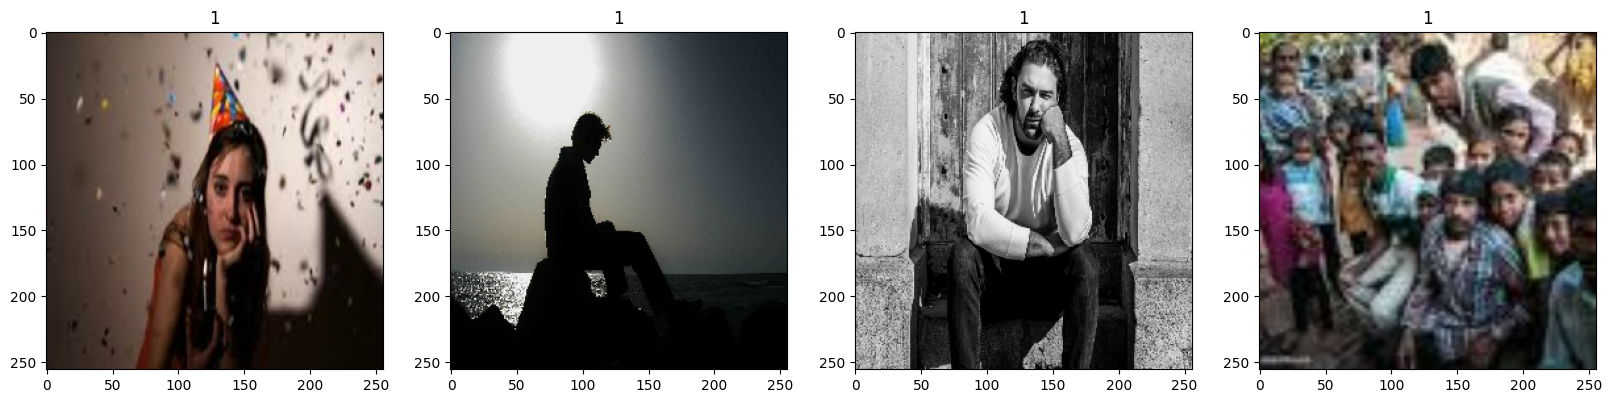

In [28]:
fig, ax = plt.subplots(ncols = 4, figsize = (20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [29]:
data = data.map(lambda x,y: (x/255, y))

In [31]:
scaled_iterator = data.as_numpy_iterator()

In [32]:
batch = scaled_iterator.next()

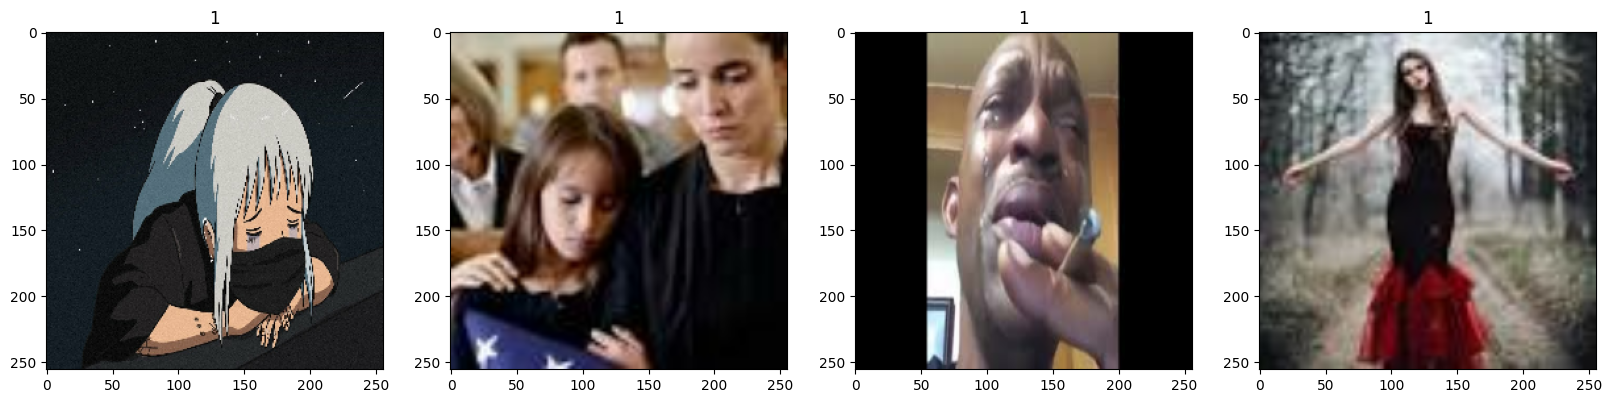

In [35]:
fig,ax = plt.subplots(ncols = 4, figsize = (20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype("float64"))
    ax[idx].title.set_text(batch[1][idx])

In [47]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [48]:
train_size + val_size + test_size

10

In [52]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization

model = Sequential()
model.add(Conv2D(16, (3,3), 1, activation = 'relu', input_shape = (256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [54]:
model.compile("adam", loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [55]:

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="logs")
hist = model.fit(train, epochs = 20, validation_data = val, callbacks = [tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 27s 3s/step - loss: 0.9142 - accuracy: 0.5580 - val_loss: 0.6661 - val_accuracy: 0.4375
Epoch 2/20
7/7 [==============================] - 33s 4s/step - loss: 0.6286 - accuracy: 0.6295 - val_loss: 0.5438 - val_accuracy: 0.7656
Epoch 3/20
7/7 [==============================] - 44s 5s/step - loss: 0.5821 - accuracy: 0.7455 - val_loss: 0.5512 - val_accuracy: 0.8125
Epoch 4/20
7/7 [==============================] - 21s 3s/step - loss: 0.5272 - accuracy: 0.7723 - val_loss: 0.5424 - val_accuracy: 0.6875
Epoch 5/20
7/7 [==============================] - 22s 3s/step - loss: 0.4702 - accuracy: 0.8036 - val_loss: 0.6238 - val_accuracy: 0.6562
Epoch 6/20
7/7 [==============================] - 22s 3s/step - loss: 0.4278 - accuracy: 0.7991 - val_loss: 0.6034 - val_accuracy: 0.7031
Epoch 7/20
7/7 [==============================] - 24s 3s/step - loss: 0.4138 - accuracy: 0.8170 - val_loss: 0.4277 - val_accuracy: 0.8125
Epoch 8/20
7/7 [==================

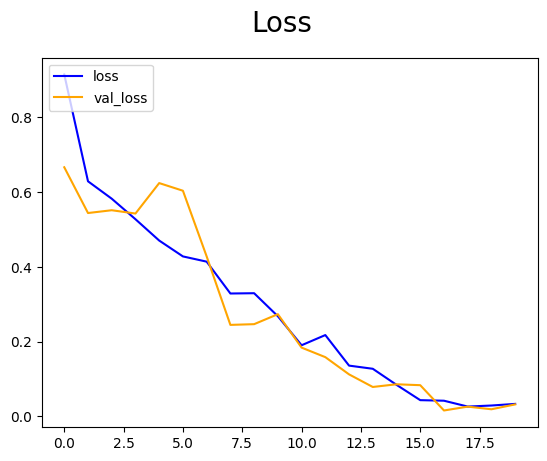

In [56]:
fig = plt.figure()
plt.plot(hist.history['loss'], color = 'blue', label = 'loss')
plt.plot(hist.history['val_loss'], color = 'orange', label = 'val_loss')
fig.suptitle('Loss', fontsize = 20)
plt.legend(loc = "upper left")
plt.show()

In [57]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [59]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [60]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 1s 611ms/step


In [61]:
print(f"Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}")

Precision:1.0, Recall:1.0, Accuracy:1.0


In [64]:
yhat =

(array([[[[0.9009277 , 0.9009277 , 0.8930846 ],
          [0.9145273 , 0.9145273 , 0.90668416],
          [0.8701009 , 0.8701009 , 0.8622578 ],
          ...,
          [0.3361979 , 0.06953125, 0.03423713],
          [0.3361979 , 0.06953125, 0.03423713],
          [0.3372549 , 0.06666667, 0.03921569]],
 
         [[0.8778962 , 0.8778962 , 0.87005305],
          [0.8837005 , 0.8837005 , 0.87585735],
          [0.89024633, 0.89024633, 0.8824032 ],
          ...,
          [0.3372549 , 0.07058824, 0.03529412],
          [0.3372549 , 0.07058824, 0.03529412],
          [0.3372549 , 0.06666667, 0.03921569]],
 
         [[0.8643411 , 0.8643411 , 0.85649794],
          [0.8902004 , 0.8902004 , 0.88235724],
          [0.91550964, 0.91550964, 0.9076665 ],
          ...,
          [0.3372549 , 0.07058824, 0.03529412],
          [0.3372549 , 0.07058824, 0.03529412],
          [0.3372549 , 0.06666667, 0.03921569]],
 
         ...,
 
         [[0.3308613 , 0.31125346, 0.298876  ],
          [0.12990

1/1 [==============================] - 0s 67ms/step


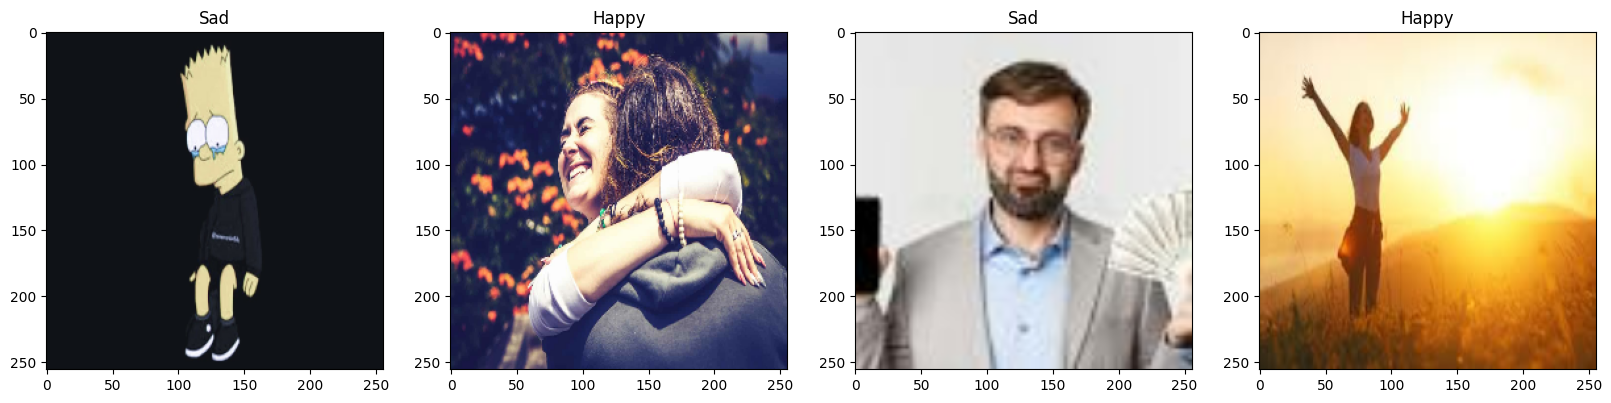

In [75]:
test_batch = test.as_numpy_iterator().next()
fig,ax = plt.subplots(ncols = 4, figsize = (20, 20))
for idx, img in enumerate(test_batch[0][:4]):
    ax[idx].imshow(img.astype("float64"))
    pred = model.predict(img.reshape(1, 256, 256, 3))
    if pred > 0.5:
        state = "Sad"
    else:
        state = "Happy"
    ax[idx].title.set_text(state)

In [76]:
from tensorflow.keras.models import load_model
model.save(os.path.join("models","happysadmodel.h5"))

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
